# 📊 Netflix Data Analysis
### 🔍 Introduction  
Netflix is a leading streaming service with thousands of movies and TV shows.  
This project will explore trends, genres, and content distribution on Netflix.  

### 🎯 Project Goals  
- **Data Cleaning:** Handle missing values, remove duplicates, and fix data types.  
- **Exploratory Data Analysis (EDA):** Find trends in content, genres, and time-based additions.  
- **Visualization:** Create bar charts, word clouds, and distribution graphs.  


In [2]:
!pip install wordcloud


In [21]:
# Import required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from wordcloud import WordCloud  

# Display settings
pd.set_option('display.max_columns', None)


In [22]:
import warnings
warnings.filterwarnings("ignore")


## 📥 Load the Dataset  
Let's load the Netflix dataset and check its basic structure, including missing values.


In [23]:
# Load the dataset
data = pd.read_csv("netflix1.csv")

# Display first few rows
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Check dataset information
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## 🛠 Data Cleaning  
Before analysis, we will clean the dataset by:  
- Removing duplicate entries  
- Handling missing values  
- Converting 'date_added' to datetime format  
- Dropping unnecessary columns if needed  


In [7]:
print(data.columns)


Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


## 📊 Exploratory Data Analysis  
Now, let's explore the dataset to find patterns and trends.


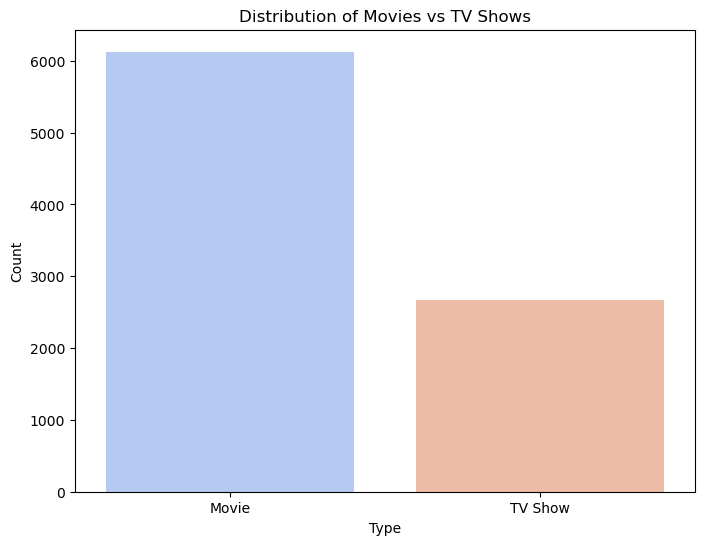

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm', errorbar=None)
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



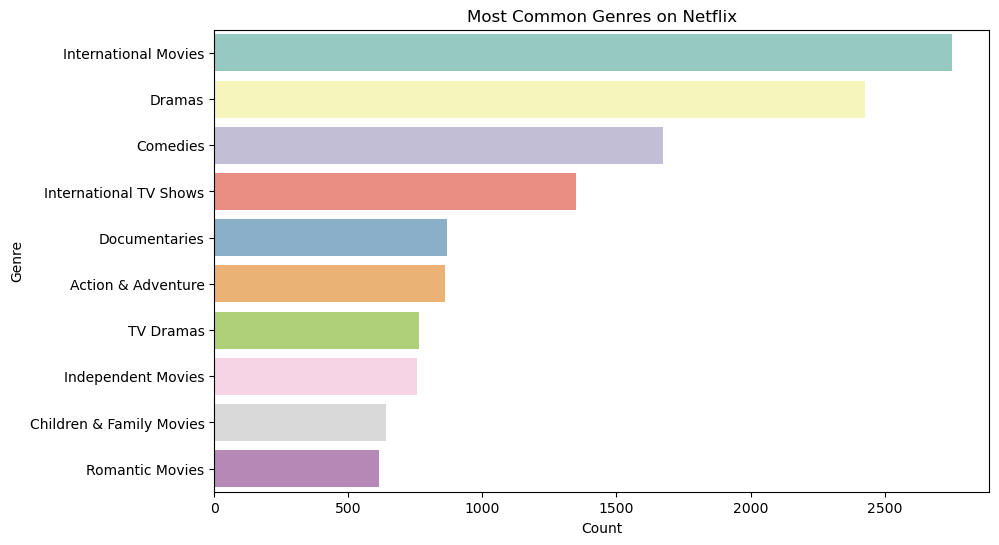

In [25]:
# Split 'listed_in' column into genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Flatten list and count genres
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, 
            x=genre_counts.values, 
            palette='Set3', 
            hue=genre_counts.index, 
            legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



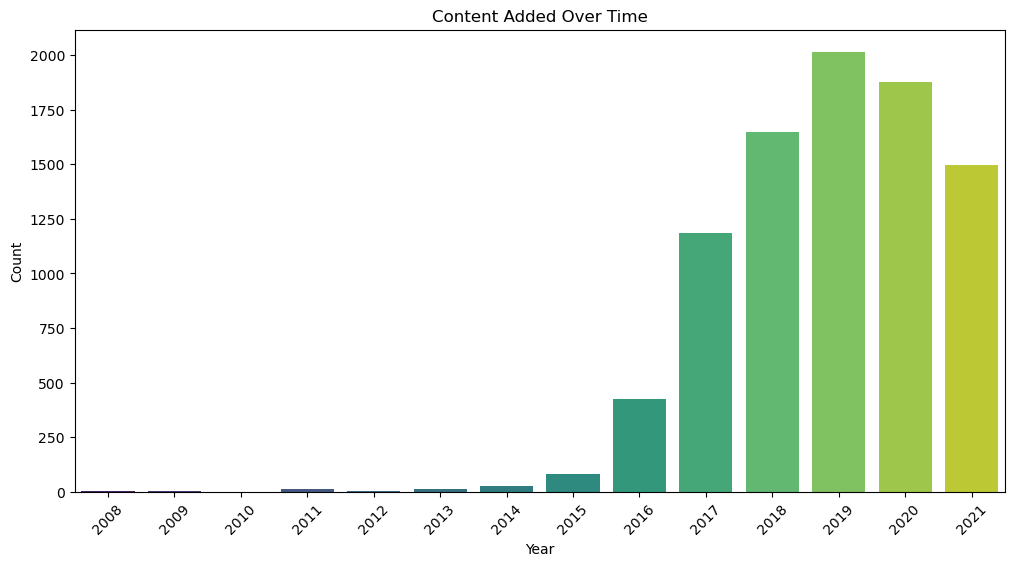

In [27]:
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', 
              data=data, 
              palette='viridis')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





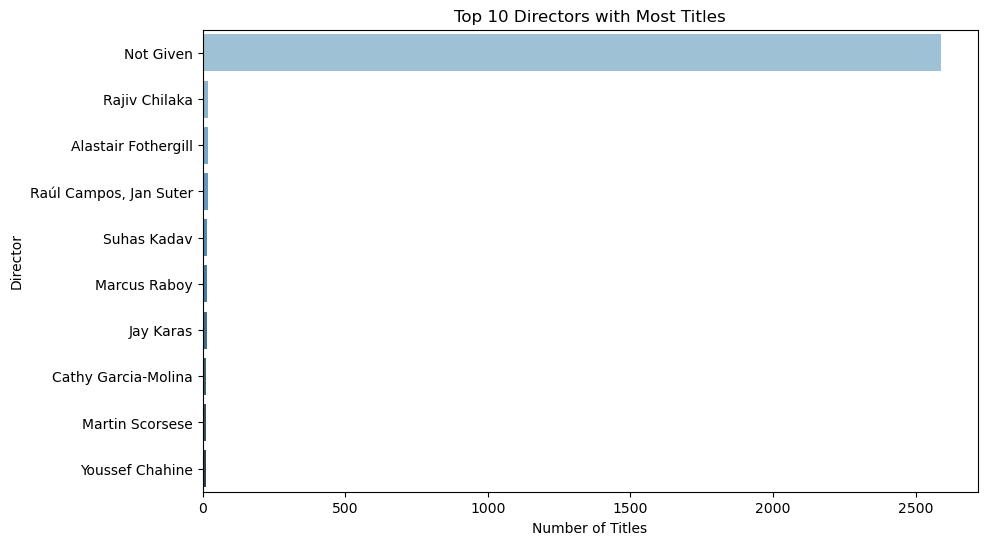

In [28]:
# Count number of titles per director
top_directors = data['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_directors.index, 
            x=top_directors.values, 
            hue=top_directors.index,  # Assign hue to y variable
            palette='Blues_d', 
            legend=False)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


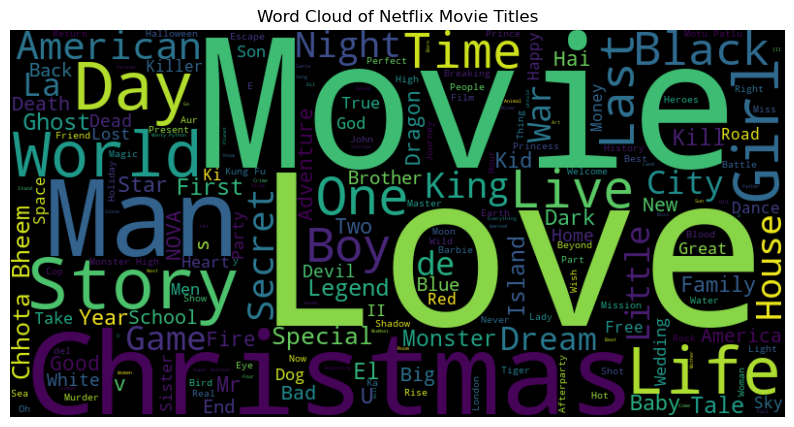

In [18]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Movie Titles')
plt.show()


# 🏁 Conclusion & Insights  

### 🔹 Key Findings  
✅ **Netflix has more Movies than TV Shows**  
✅ **Dramas, Comedies, and Documentaries are the most common genres**  
✅ **Content production and acquisitions increased significantly in recent years**  
✅ **The most active directors have contributed multiple projects**  

### 🔹 Next Steps  
📌 **Feature Engineering**: Extract more insights (e.g., duration analysis).  
📌 **Machine Learning**: Predict content trends using ML models.  
📌 **Advanced Visualization**: Use interactive dashboards with Power BI or Tableau.  

This project provides a **strong foundation** for data analysis using Python! 🚀  


🔹 Final Summary

🔹 📥 Dataset: Netflix Movies & TV Shows

🔹 🛠 Tools Used: Python (pandas, Matplotlib, Seaborn, NumPy, WordCloud)

🔹 📊 Key Steps: Data Cleaning → Exploratory Data Analysis → Visualization

🔹 📈 Insights: Content distribution, genre trends, and time-based analysis

🔹 🔮 Next Steps: Feature engineering, ML models, and advanced visualization